In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Carga el archivo
df = pd.read_csv('pgh_peru.csv')


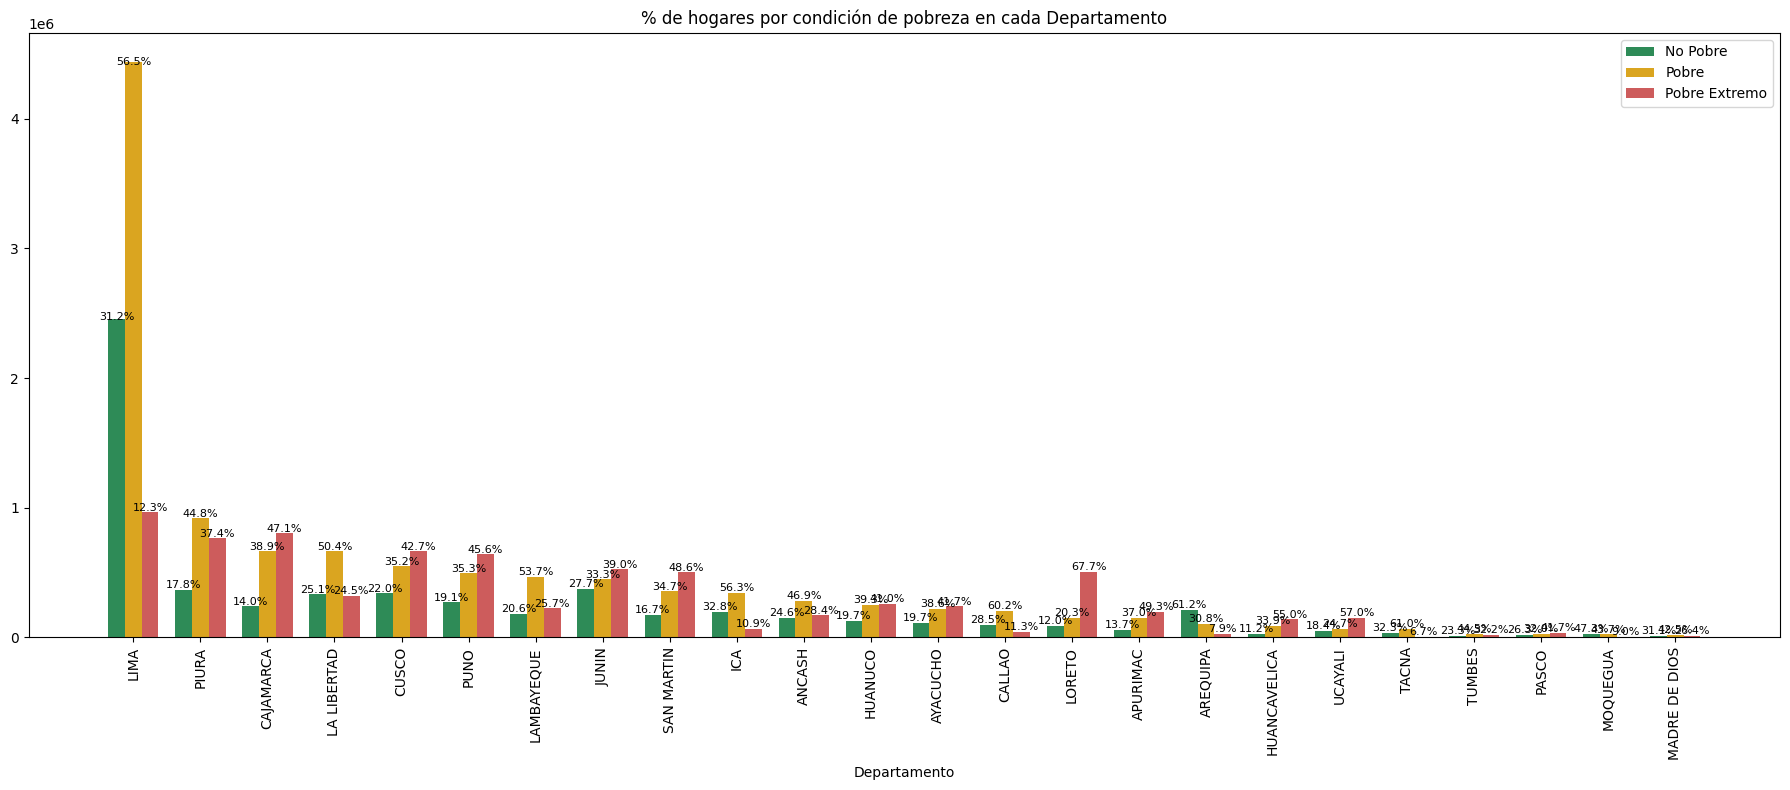

In [40]:
df_dep = df.groupby('Departamento')[['No Pobre', 'Pobre', 'Pobre extremo']].sum()
df_dep['Total'] = df_dep.sum(axis=1)
df_dep = df_dep.sort_values(by='Pobre', ascending=False)

bar_width = 0.25
x = range(len(df_dep))

# Aumentar tamaño de la figura para mejor visibilidad
plt.figure(figsize=(18, 8))

bars_no_pobre = plt.bar(x, df_dep['No Pobre'], width=bar_width, label='No Pobre', color='seagreen')
bars_pobre = plt.bar([i + bar_width for i in x], df_dep['Pobre'], width=bar_width, label='Pobre', color='goldenrod')
bars_pobre_extremo = plt.bar([i + 2*bar_width for i in x], df_dep['Pobre extremo'], width=bar_width, label='Pobre Extremo', color='indianred')

def poner_etiquetas_porcentaje(barras):
    for i, barra in enumerate(barras):
        altura = barra.get_height()
        total = df_dep['Total'].iloc[i]
        porcentaje = (altura / total) * 100 if total > 0 else 0
        if porcentaje > 3:  # Mostrar etiquetas sólo si el porcentaje es > 3% (ajustable)
            plt.text(
                barra.get_x() + barra.get_width() / 2,
                altura - (altura * 0.01),  # Posición dentro de la barra (10% desde arriba)
                f'{porcentaje:.1f}%',
                ha='center',
                va='bottom',
                fontsize=8,
            )

poner_etiquetas_porcentaje(bars_no_pobre)
poner_etiquetas_porcentaje(bars_pobre)
poner_etiquetas_porcentaje(bars_pobre_extremo)

plt.xlabel('Departamento')
plt.title('% de hogares por condición de pobreza en cada Departamento')
plt.xticks([i + bar_width for i in x], df_dep.index, rotation=90)
plt.legend()
plt.tight_layout()

plt.show()





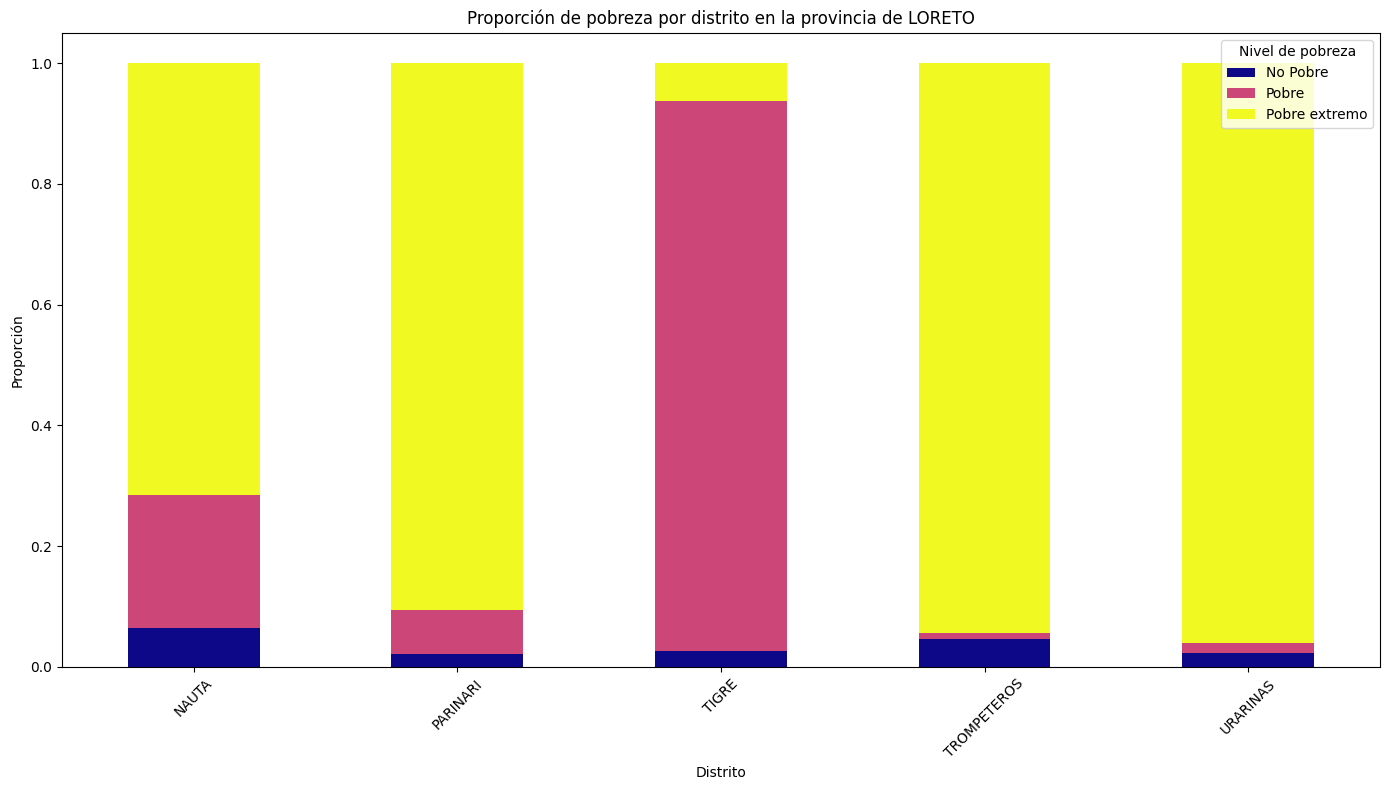

In [39]:
provincia = 'LORETO'
df_provincia = df[df['Provincia'] == provincia].copy()
df_huaraz_prop = df_provincia.copy()
cols = ['No Pobre', 'Pobre', 'Pobre extremo']
df_huaraz_prop[cols] = df_huaraz_prop[cols].div(df_huaraz_prop[cols].sum(axis=1), axis=0)

df_huaraz_prop.set_index('Distrito')[cols].plot(
    kind='bar', stacked=True, figsize=(14, 8), colormap='plasma'
)
plt.title(f'Proporción de pobreza por distrito en la provincia de {provincia}')
plt.ylabel('Proporción')
plt.xlabel('Distrito')
plt.xticks(rotation=45)
plt.legend(title='Nivel de pobreza')
plt.tight_layout()
plt.show()



In [21]:
import pandas as pd

# Cargar tu dataset
df = pd.read_csv('pgh_peru.csv')

# Crear columna de total de hogares por distrito
df['Total Hogares'] = df['No Pobre'] + df['Pobre'] + df['Pobre extremo']

# Evitar divisiones por cero
df = df[df['Total Hogares'] > 0]

# Crear columna de porcentaje de pobreza extrema
df['Porcentaje Pobreza Extrema'] = df['Pobre extremo'] / df['Total Hogares'] * 100

# Obtener el Top 10 de distritos con mayor porcentaje de pobreza extrema
top10_pobreza_extrema = df[['Departamento', 'Provincia', 'Distrito', 'Porcentaje Pobreza Extrema']]\
                        .sort_values(by='Porcentaje Pobreza Extrema', ascending=False)\
                        .head(10)

# Mostrar el Top 10
top10_pobreza_extrema


,Departamento,Provincia,Distrito,Porcentaje Pobreza Extrema
1401,LORETO,LORETO,URARINAS,95.992103
1388,LORETO,MAYNAS,TORRES CAUSANA,95.820337
1395,LORETO,ALTO AMAZONAS,SANTA CRUZ,95.813953
1409,LORETO,REQUENA,EMILIO SAN MARTIN,95.724783
1790,UCAYALI,CORONEL PORTILLO,IPARIA,95.062638
1418,LORETO,UCAYALI,INAHUAYA,94.727592
1400,LORETO,LORETO,TROMPETEROS,94.431373
1798,UCAYALI,ATALAYA,YURUA,94.407457
1394,LORETO,ALTO AMAZONAS,LAGUNAS,94.260761
476,AYACUCHO,VILCAS HUAMAN,ACCOMARCA,94.071763


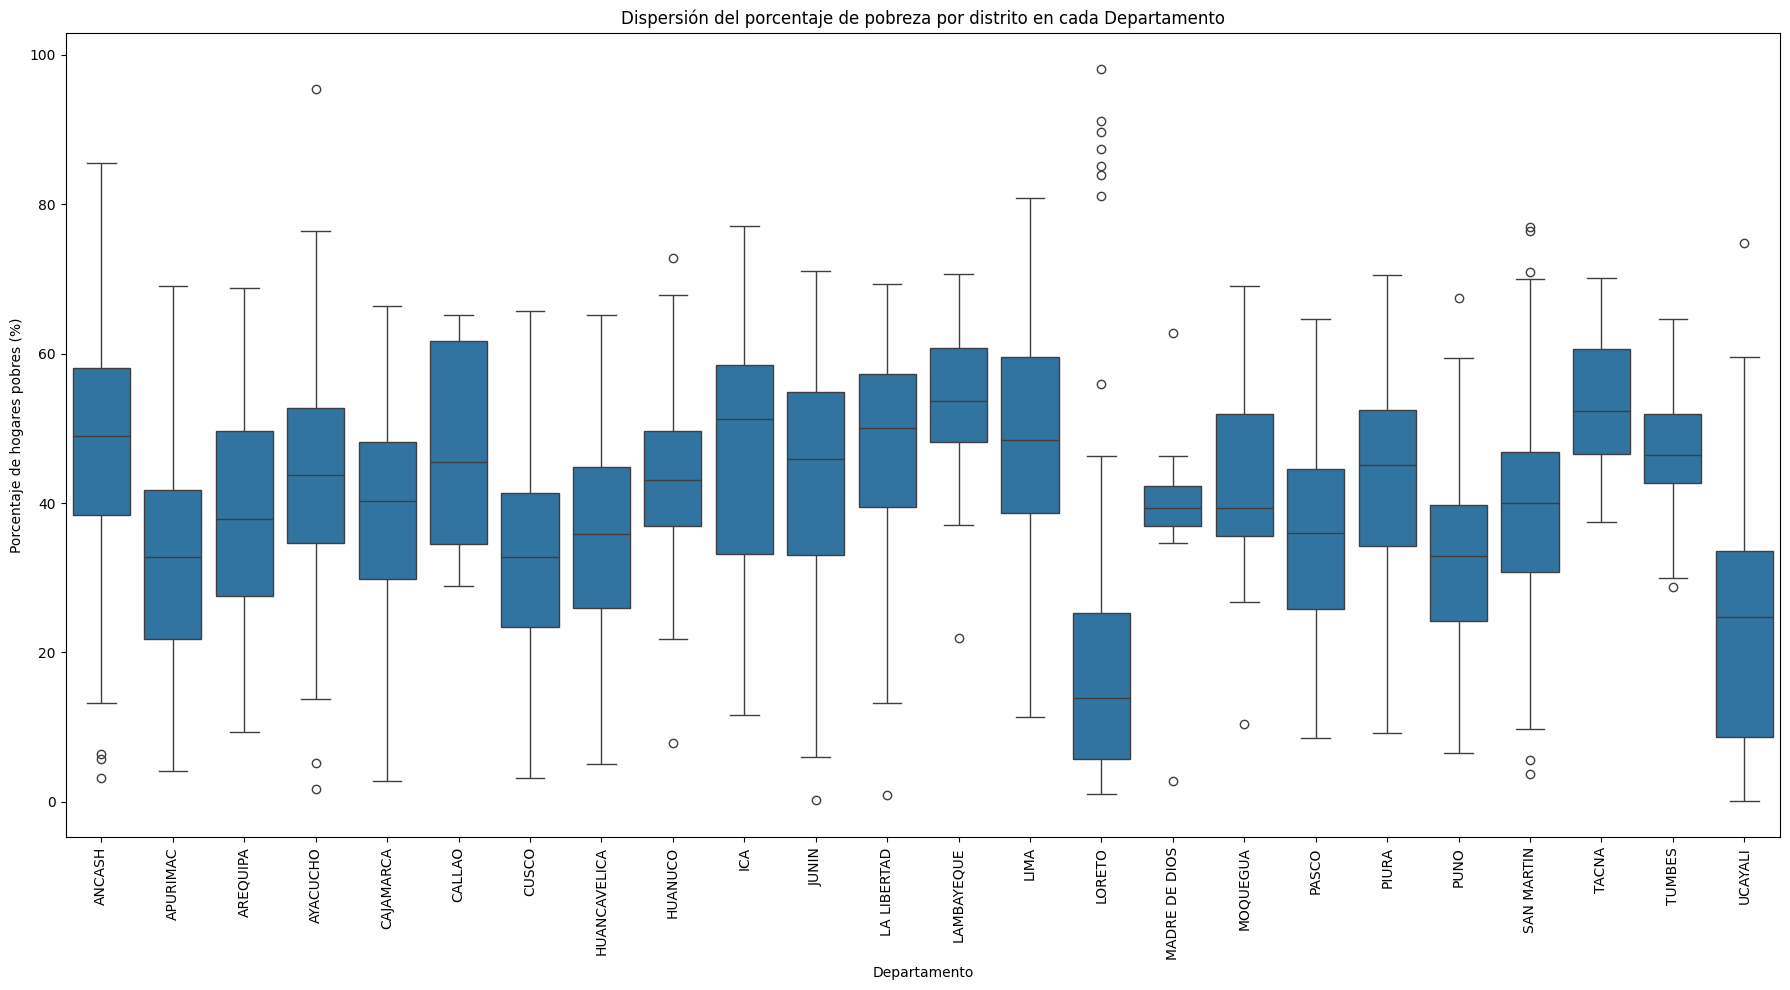

In [36]:
# Calcular porcentaje de pobreza por distrito
df['Total'] = df[['No Pobre', 'Pobre', 'Pobre extremo']].sum(axis=1)
df['Porcentaje_Pobre'] = (df['Pobre'] / df['Total']) * 100

# Crear el boxplot por departamento
plt.figure(figsize=(18, 10))
sns.boxplot(x='Departamento', y='Porcentaje_Pobre', data=df)

# Personalizar el gráfico
plt.xticks(rotation=90)
plt.ylabel('Porcentaje de hogares pobres (%)')
plt.title('Dispersión del porcentaje de pobreza por distrito en cada Departamento')
plt.tight_layout()

plt.show()


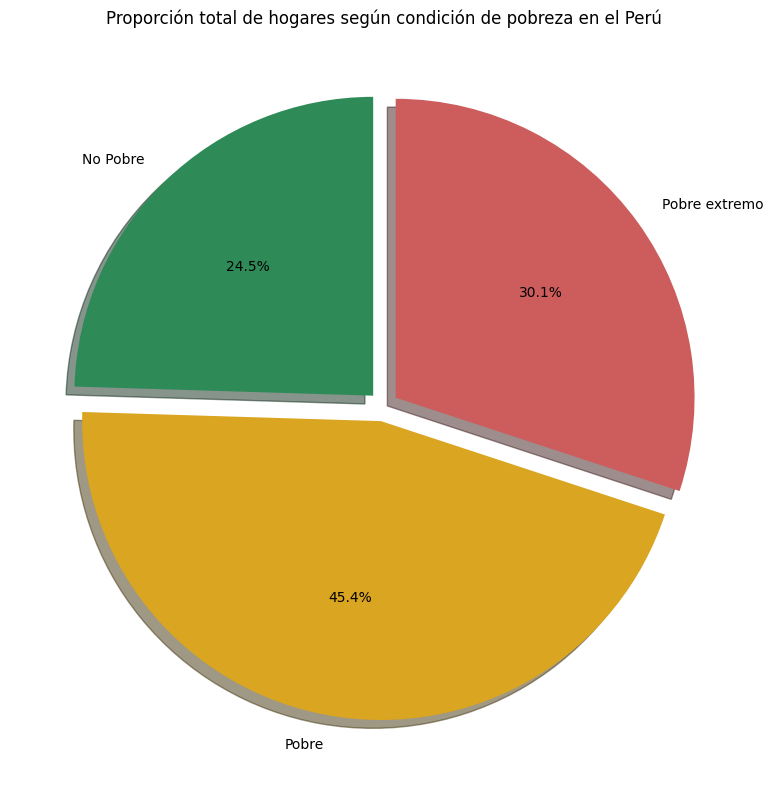

In [37]:
# Sumar el total nacional por categoría
totales = df[['No Pobre', 'Pobre', 'Pobre extremo']].sum()

# Crear el gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    totales,
    labels=totales.index,
    autopct='%1.1f%%',  # Mostrar el porcentaje con 1 decimal
    colors=['seagreen', 'goldenrod', 'indianred'],
    startangle=90,
    explode=(0.05, 0.05, 0.05),  # Separar un poco cada sección para mejor visualización
    shadow=True
)

# Título y ajustes
plt.title('Proporción total de hogares según condición de pobreza en el Perú')
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [55]:
import geopandas as gpd

# Cargar el shapefile (solo apuntas al .shp)
gdf = gpd.read_file('DISTRITOS_inei_geogpsperu_suyopomalia.shp')

# Ver las columnas que tiene el shapefile
print(gdf.columns)

# Ver las primeras filas
print(gdf.head())


Index(['UBIGEO', 'OBJECTID', 'NOMBDEP', 'NOMBPROV', 'NOMBDIST', 'CAPITAL',
       'POBTOTAL', 'POB_EDAD_T', 'POB_EDAD_E', 'DENSIDAD', 'POBMASCU',
       'POBFEMEN', 'POBMASCU_P', 'POBFEMEN_P', 'R_MASCULIN', 'POBURBANA',
       'POBRURAL', 'POBURBANA_', 'POBRURAL_P', 'EDAD_PROME', 'POB_0_14',
       'POB_15_29', 'POB_30_59', 'POB_60_MAS', 'VIV_PARTIC', 'VIV_PART_1',
       'HOGARES', 'Shape_Leng', 'Shape_Area', 'DIRECCION', 'POB_PROYEC',
       'POB_EDAD_1', 'POB_EDAD_2', 'EDAD_MEDIA', 'POB_0_14_P', 'POB_15_29_',
       'POB_30_59_', 'POB_60_M_1', 'POB_ANALFA', 'POB_ANAL_1', 'HOMBRES_AN',
       'HOMBRES__1', 'MUJERES_AN', 'MUJERES__1', 'MUJERES_ED', 'MUJERES__2',
       'TOTAL_MADR', 'MADRES_SOL', 'MADRES_S_1', 'MUJERES_AD', 'MADRES_ADO',
       'MADRES_A_1', 'AL_MENOS_1', 'AL_MENOS_2', 'SIN_DISCAP', 'SIN_DISC_1',
       'ALGUNA_NBI', 'NBI_PORC', 'VIV_PART_2', 'IC_INF', 'IC_SUP',
       'UBIC_POBMO', 'TOTAL_DEFU', 'TOTAL_DE_1', 'TOTAL_DE_2', 'NAC_BAJOPE',
       'NAC_BAJO_1', 'MUJERES_

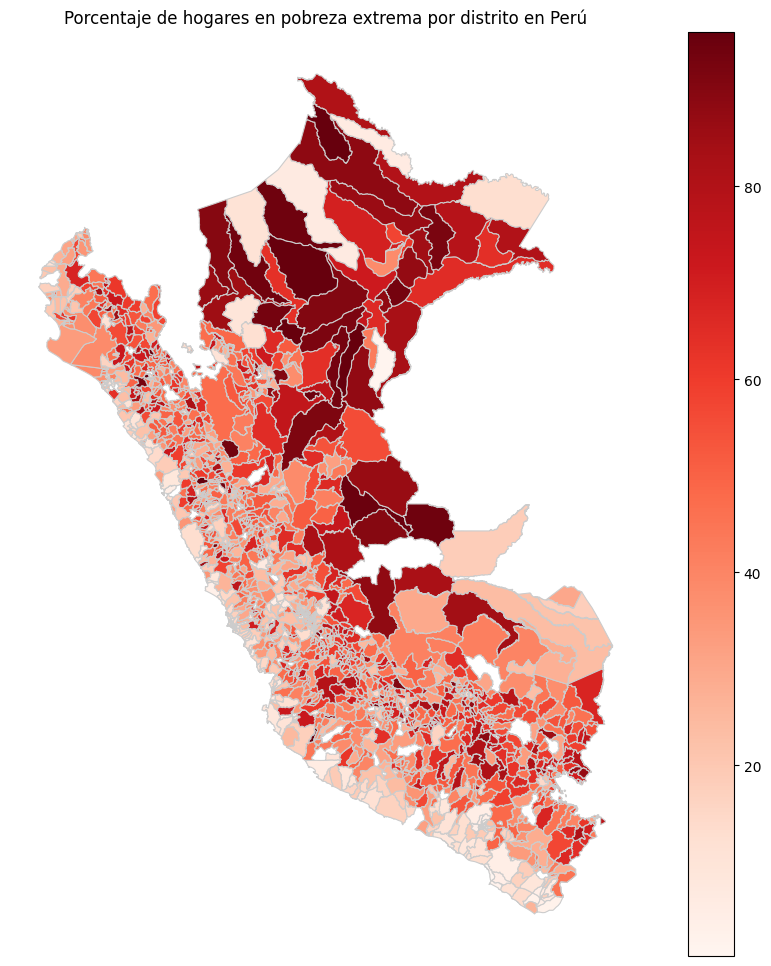

In [56]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

df = pd.read_csv('pgh_peru.csv')
gdf = gpd.read_file('DISTRITOS_inei_geogpsperu_suyopomalia.shp')

gdf = gdf.merge(df, left_on='NOMBDIST', right_on='Distrito')
gdf['Porcentaje_Pobreza_Extrema'] = (gdf['Pobre extremo'] / (gdf[['No Pobre', 'Pobre', 'Pobre extremo']].sum(axis=1))) * 100

fig, ax = plt.subplots(1, 1, figsize=(12, 12))

gdf.plot(
    column='Porcentaje_Pobreza_Extrema',
    cmap='Reds',
    linewidth=0.8,
    ax=ax,
    edgecolor='0.8',
    legend=True
)


plt.title('Porcentaje de hogares en pobreza extrema por distrito en Perú')
plt.axis('off')
plt.show()
